In [3]:
import polars as pl
from enum import Enum
import matplotlib.pyplot as plt

csv_file = 'original_stock_data.csv'

def plot_graph(ArrayY, title, xlabel, ylabel):
    fig, ax = plt.subplots()
    ax.plot(ArrayY)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.show()

class eIntervals(Enum):
    day = 375
    week = 1875
    month = 7500

class eTraingParam(Enum):
    CLOSE = "close"
    EMA_5 = "ema5"
    EMA_20 = "ema20"
    MACD_5_20 = "macd520"
    DATE = "date"

class Data:
    def __init__(self):
        self.data_table = pl.DataFrame()
        self.original_data = pl.DataFrame()
        self.setup(csv_file)
        

    def setup(self, csv_file):
        df = pl.read_csv(csv_file)
        self.original_data = df
        self.data_table = pl.DataFrame({
            eTraingParam.DATE.value: df[eTraingParam.DATE.value],
            eTraingParam.CLOSE.value: df[eTraingParam.CLOSE.value],
            eTraingParam.EMA_5.value: df[eTraingParam.EMA_5.value],
            eTraingParam.EMA_20.value: df[eTraingParam.EMA_20.value],
            eTraingParam.MACD_5_20.value: df[eTraingParam.MACD_5_20.value]
        })

    def plot_by_interval(self,interval,eTraingParam:eTraingParam):
        title = ""
        if isinstance(interval, eIntervals):
            title = f"{eTraingParam.name} {interval.name} Graph"
            tmp_data = data_instance.get_sample_data_by_minutes(interval.value)
            plot_graph(tmp_data[eTraingParam.value],title,f"{interval.value} minutes interval","Close Price")
        else:
            title = f"{interval} interval {eTraingParam.value} Graph"
            tmp_data = data_instance.get_sample_data_by_minutes(interval)
            plot_graph(tmp_data[eTraingParam.value],title,f"{interval}m interval","Close Price")

    def set_sample_data_by_minutes(self, minutes):
        self.data_table = self.data_table[::minutes]

    def get_sample_data_by_minutes(self, minutes):
        return self.data_table[::minutes]

    @property
    def date(self):
        return self.data_table[eTraingParam.DATE.value].to_list()

    @property
    def close(self):
        return self.data_table[eTraingParam.CLOSE.value].to_list()

    @property
    def ema_5(self):
        return self.data_table[eTraingParam.EMA_5.value].to_list()

    @property
    def ema_20(self):
        return self.data_table[eTraingParam.EMA_20.value].to_list()

    @property
    def macd_5_20(self):
        return self.data_table[eTraingParam.MACD_5_20.value].to_list()

data_instance = Data()

In [4]:
print(f"Our dataset contains the following parameters: {data_instance.original_data.columns}")
print(data_instance.original_data[:4])
print(f"After researching extensively on the web and exploring about algorithmic trading principles, we have chosen to proceed with the following parameters: {[member.name for member in eTraingParam]}")


Our dataset contains the following parameters: ['date', 'close', 'high', 'low', 'open', 'volume', 'sma5', 'sma10', 'sma15', 'sma20', 'ema5', 'ema10', 'ema15', 'ema20', 'upperband', 'middleband', 'lowerband', 'HT_TRENDLINE', 'KAMA10', 'KAMA20', 'KAMA30', 'SAR', 'TRIMA5', 'TRIMA10', 'TRIMA20', 'ADX5', 'ADX10', 'ADX20', 'APO', 'CCI5', 'CCI10', 'CCI15', 'macd510', 'macd520', 'macd1020', 'macd1520', 'macd1226', 'MFI', 'MOM10', 'MOM15', 'MOM20', 'ROC5', 'ROC10', 'ROC20', 'PPO', 'RSI14', 'RSI8', 'slowk', 'slowd', 'fastk', 'fastd', 'fastksr', 'fastdsr', 'ULTOSC', 'WILLR', 'ATR', 'Trange', 'TYPPRICE', 'HT_DCPERIOD', 'BETA']
shape: (4, 60)
┌────────────────┬─────────┬─────────┬─────────┬───┬────────┬─────────────┬─────────────┬──────────┐
│ date           ┆ close   ┆ high    ┆ low     ┆ … ┆ Trange ┆ TYPPRICE    ┆ HT_DCPERIOD ┆ BETA     │
│ ---            ┆ ---     ┆ ---     ┆ ---     ┆   ┆ ---    ┆ ---         ┆ ---         ┆ ---      │
│ str            ┆ f64     ┆ f64     ┆ f64     ┆   ┆ f64   

We can see that the biger resolution, the smoother graph
This happens because the smalleer resoution includes in it more changes


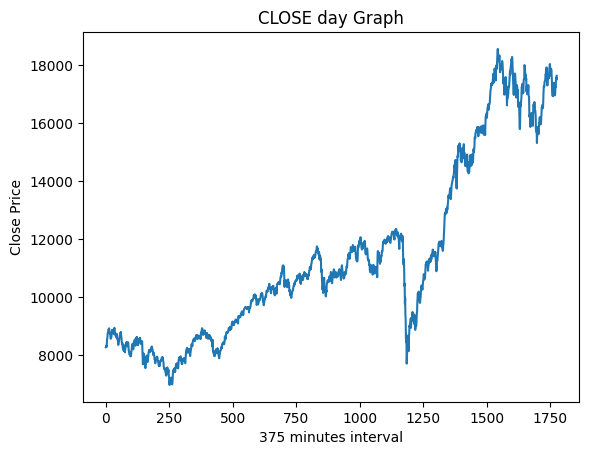

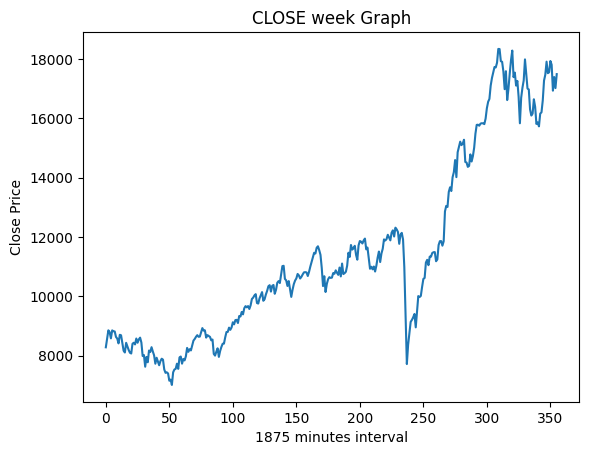

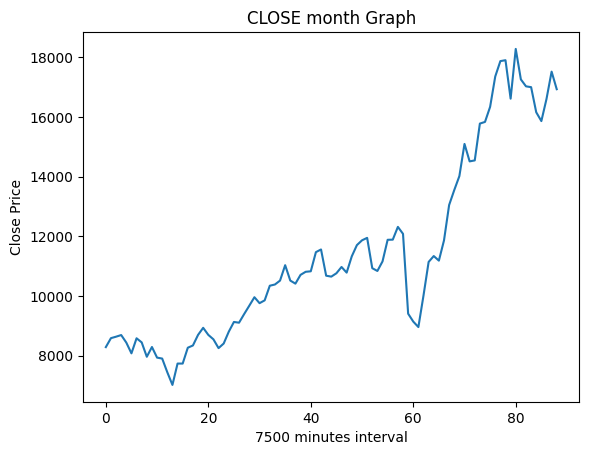

In [5]:
print("We can see that the biger resolution, the smoother graph")
print("This happens because the smalleer resoution includes in it more changes")
data_instance.plot_by_interval(eIntervals.day,eTraingParam.CLOSE)
data_instance.plot_by_interval(eIntervals.week,eTraingParam.CLOSE)
data_instance.plot_by_interval(eIntervals.month,eTraingParam.CLOSE)
